In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(sns.__version__)
sns.set_theme(style="darkgrid")

0.11.2


In [52]:
# load model weights
df = pd.read_csv("data/models/model_weights.csv")
print(df.shape)
df.head(10)

(9, 20)


,term,estimate,std.error,statistic,p.value,term.1,estimate.1,std.error.1,statistic.1,p.value.1,term.2,estimate.2,std.error.2,statistic.2,p.value.2,term.3,estimate.3,std.error.3,statistic.3,p.value.3
0,(Intercept),-0.532367,1.353713,-0.393265,6.941686e-01,(Intercept),-2.590774,1.481055,-1.749276,8.039083e-02,(Intercept),-2.543512,1.653347,-1.538402,1.240977e-01,(Intercept),-2.235904,1.688611,-1.324108,1.856067e-01
1,PVI_2016,0.002885,0.003613,0.798495,4.246841e-01,PVI_2016,0.004277,0.004059,1.053540,2.922159e-01,PVI_2016,0.004487,0.004398,1.020117,3.077879e-01,PVI_2016,0.007385,0.004648,1.589002,1.122058e-01
2,perc_NHWA,-0.004465,0.014814,-0.301430,7.631197e-01,perc_NHWA,0.017233,0.016153,1.066839,2.861686e-01,perc_NHWA,0.010810,0.018093,0.597442,5.502756e-01,perc_NHWA,0.008510,0.018493,0.460185,6.454294e-01
3,perc_NHNA,0.014585,0.140698,0.103659,9.174511e-01,perc_NHNA,0.225207,0.158729,1.418816,1.561026e-01,perc_NHNA,0.332513,0.175151,1.898441,5.777199e-02,perc_NHNA,0.137446,0.183735,0.748066,4.545017e-01
4,perc_NHBA,0.151502,0.014954,10.131073,1.589381e-23,perc_NHBA,0.205115,0.016332,12.559034,6.348639e-35,perc_NHBA,0.227616,0.018288,12.446031,2.189649e-34,perc_NHBA,0.225527,0.018648,12.094095,1.243411e-32
5,perc_HISP,0.008125,0.015536,0.522961,6.010632e-01,perc_HISP,0.022716,0.017001,1.336199,1.816306e-01,perc_HISP,0.019704,0.019175,1.027559,3.042729e-01,perc_HISP,0.001232,0.019611,0.062830,9.499076e-01
6,Edu_perc_NoHS,-0.085655,0.030661,-2.793569,5.265664e-03,Edu_perc_NoHS,-0.091048,0.034234,-2.659578,7.883923e-03,Edu_perc_NoHS,-0.097848,0.036772,-2.660952,7.850041e-03,Edu_perc_NoHS,-0.087949,0.038680,-2.273768,2.307729e-02
7,Econ_perc_poverty,0.270084,0.025330,10.662577,8.145046e-26,Econ_perc_poverty,0.296418,0.029094,10.188447,8.018621e-24,Econ_perc_poverty,0.320404,0.032348,9.904928,1.202363e-22,Econ_perc_poverty,0.337045,0.034066,9.893954,1.321570e-22
8,Unemployment_rate,0.025964,0.055892,0.464545,6.423110e-01,Unemployment_rate,0.010570,0.072957,0.144877,8.848220e-01,Unemployment_rate,0.098498,0.085180,1.156349,2.476673e-01,Unemployment_rate,0.101628,0.100804,1.008180,3.134806e-01


In [75]:
# transpose table 
models = []
years = [2014, 2015, 2016, 2017]

for i, year in enumerate(years):
    model = df.iloc[:, i*5:(i+1)*5]
    model = model.rename(index=str, columns={model.columns[0]:"term",
                                             model.columns[1]:"estimate",
                                             model.columns[2]:"std.error",
                                             model.columns[3]:"statistic",
                                             model.columns[4]:"p.value"})
    model = model.T
    model.columns = model.iloc[0]
    model = model[1:]
    model["year"] = year
    models.append(model)

models = pd.concat(models)
models = models.reset_index()
models

term,index,(Intercept),PVI_2016,perc_NHWA,perc_NHNA,perc_NHBA,perc_HISP,Edu_perc_NoHS,Econ_perc_poverty,Unemployment_rate,year
0,estimate,-0.532367,0.00288527,-0.00446542,0.0145846,0.151502,0.00812466,-0.0856549,0.270084,0.0259642,2014
1,std.error,1.35371,0.00361339,0.0148141,0.140698,0.0149542,0.0155359,0.0306615,0.0253301,0.0558917,2014
2,statistic,-0.393265,0.798495,-0.30143,0.103659,10.1311,0.522961,-2.79357,10.6626,0.464545,2014
3,p.value,0.694169,0.424684,0.76312,0.917451,1.58938e-23,0.601063,0.00526566,8.14505e-26,0.642311,2014
4,estimate,-2.59077,0.00427668,0.0172329,0.225207,0.205115,0.0227164,-0.091048,0.296418,0.0105697,2015
5,std.error,1.48105,0.00405934,0.0161532,0.158729,0.0163321,0.0170008,0.034234,0.0290936,0.0729565,2015
6,statistic,-1.74928,1.05354,1.06684,1.41882,12.559,1.3362,-2.65958,10.1884,0.144877,2015
7,p.value,0.0803908,0.292216,0.286169,0.156103,6.34864e-35,0.181631,0.00788392,8.01862e-24,0.884822,2015
8,estimate,-2.54351,0.00448658,0.0108097,0.332513,0.227616,0.0197039,-0.0978481,0.320404,0.098498,2016
9,std.error,1.65335,0.00439811,0.0180933,0.175151,0.0182882,0.0191755,0.0367718,0.0323479,0.0851802,2016


In [54]:
# # get confidence intervals
# features = ["PVI_2016", 
#             "perc_NHWA",
#             "perc_NHNA",
#             "perc_NHBA",
#             "perc_HISP",
#             "Edu_perc_NoHS",
#             "Econ_perc_poverty",
#             "Unemployment_rate"]
# for year in years:
#     models = models.append({'index': "estimate_upper",
#                             "year": year,
#                             "PVI_2016": models["PVI_2016"]+1.96*models[:]}, ignore_index=True)
#     models = models.append({'index': "estimate_lower",
#                             "year": year}, ignore_index=True)
    
# models

term,index,(Intercept),PVI_2016,perc_NHWA,perc_NHNA,perc_NHBA,perc_HISP,Edu_perc_NoHS,Econ_perc_poverty,Unemployment_rate,year
0,estimate,-0.532367,0.00288527,-0.00446542,0.0145846,0.151502,0.00812466,-0.0856549,0.270084,0.0259642,2014
1,std.error,1.35371,0.00361339,0.0148141,0.140698,0.0149542,0.0155359,0.0306615,0.0253301,0.0558917,2014
2,statistic,-0.393265,0.798495,-0.30143,0.103659,10.1311,0.522961,-2.79357,10.6626,0.464545,2014
3,p.value,0.694169,0.424684,0.76312,0.917451,1.58938e-23,0.601063,0.00526566,8.14505e-26,0.642311,2014
4,estimate,-2.59077,0.00427668,0.0172329,0.225207,0.205115,0.0227164,-0.091048,0.296418,0.0105697,2015
5,std.error,1.48105,0.00405934,0.0161532,0.158729,0.0163321,0.0170008,0.034234,0.0290936,0.0729565,2015
6,statistic,-1.74928,1.05354,1.06684,1.41882,12.559,1.3362,-2.65958,10.1884,0.144877,2015
7,p.value,0.0803908,0.292216,0.286169,0.156103,6.34864e-35,0.181631,0.00788392,8.01862e-24,0.884822,2015
8,estimate,-2.54351,0.00448658,0.0108097,0.332513,0.227616,0.0197039,-0.0978481,0.320404,0.098498,2016
9,std.error,1.65335,0.00439811,0.0180933,0.175151,0.0182882,0.0191755,0.0367718,0.0323479,0.0851802,2016


In [81]:
# get subsets of dataframe
coeffs = models[models["index"] == "estimate"].drop(["index", "(Intercept)"], axis=1)
ses = models[models["index"] == "std.error"].drop(["index", "(Intercept)"], axis=1)
pvals = models[models["index"] == "p.value"].drop(["index", "(Intercept)"], axis=1)

In [85]:
col_names = {"PVI_2016": "PVI_2016_se",
             "perc_NHWA": "perc_NHWA_se",
             "perc_NHNA": "perc_NHNA_se",
             "perc_NHBA": "perc_NHBA_se",
             "perc_HISP": "perc_HISP_se",
             "Edu_perc_NoHS": "Edu_perc_NoHS_se",
             "Econ_perc_poverty": "Econ_perc_poverty_se",
             "Unemployment_rate": "Unemployment_rate_se"
            }
ses = ses.rename(index=str, columns=col_names)
coeffs_full = coeffs.merge(ses, on="year")
coeffs_full

term,PVI_2016,perc_NHWA,perc_NHNA,perc_NHBA,perc_HISP,Edu_perc_NoHS,Econ_perc_poverty,Unemployment_rate,year,PVI_2016_se,perc_NHWA_se,perc_NHNA_se,perc_NHBA_se,perc_HISP_se,Edu_perc_NoHS_se,Econ_perc_poverty_se,Unemployment_rate_se
0,0.00288527,-0.00446542,0.0145846,0.151502,0.00812466,-0.0856549,0.270084,0.0259642,2014,0.00361339,0.0148141,0.140698,0.0149542,0.0155359,0.0306615,0.0253301,0.0558917
1,0.00427668,0.0172329,0.225207,0.205115,0.0227164,-0.091048,0.296418,0.0105697,2015,0.00405934,0.0161532,0.158729,0.0163321,0.0170008,0.034234,0.0290936,0.0729565
2,0.00448658,0.0108097,0.332513,0.227616,0.0197039,-0.0978481,0.320404,0.098498,2016,0.00439811,0.0180933,0.175151,0.0182882,0.0191755,0.0367718,0.0323479,0.0851802
3,0.00738541,0.00851028,0.137446,0.225527,0.00123216,-0.0879491,0.337045,0.101628,2017,0.00464783,0.0184932,0.183735,0.0186477,0.019611,0.0386799,0.0340657,0.100804


In [86]:
features = ["PVI_2016", 
            "perc_NHWA",
            "perc_NHNA",
            "perc_NHBA",
            "perc_HISP",
            "Edu_perc_NoHS",
            "Econ_perc_poverty",
            "Unemployment_rate"]

for feature in features:
    coeffs_full[f"{feature}_upper"] = coeffs_full[feature] + 1.96*coeffs_full[f"{feature}_se"]
    coeffs_full[f"{feature}_lower"] = coeffs_full[feature] - 1.96*coeffs_full[f"{feature}_se"]

In [92]:
coeffs_full

term,PVI_2016,perc_NHWA,perc_NHNA,perc_NHBA,perc_HISP,Edu_perc_NoHS,Econ_perc_poverty,Unemployment_rate,year,PVI_2016_se,...,perc_NHBA_upper,perc_NHBA_lower,perc_HISP_upper,perc_HISP_lower,Edu_perc_NoHS_upper,Edu_perc_NoHS_lower,Econ_perc_poverty_upper,Econ_perc_poverty_lower,Unemployment_rate_upper,Unemployment_rate_lower
0,0.00288527,-0.00446542,0.0145846,0.151502,0.00812466,-0.0856549,0.270084,0.0259642,2014,0.00361339,...,0.180812,0.122192,0.038575,-0.0223257,-0.0255584,-0.145751,0.319731,0.220437,0.135512,-0.0835835
1,0.00427668,0.0172329,0.225207,0.205115,0.0227164,-0.091048,0.296418,0.0105697,2015,0.00405934,...,0.237126,0.173104,0.0560379,-0.0106051,-0.0239494,-0.158147,0.353442,0.239395,0.153564,-0.132425
2,0.00448658,0.0108097,0.332513,0.227616,0.0197039,-0.0978481,0.320404,0.098498,2016,0.00439811,...,0.263461,0.191771,0.0572879,-0.01788,-0.0257753,-0.169921,0.383806,0.257002,0.265451,-0.0684552
3,0.00738541,0.00851028,0.137446,0.225527,0.00123216,-0.0879491,0.337045,0.101628,2017,0.00464783,...,0.262077,0.188978,0.0396697,-0.0372054,-0.0121365,-0.163762,0.403814,0.270276,0.299203,-0.095947


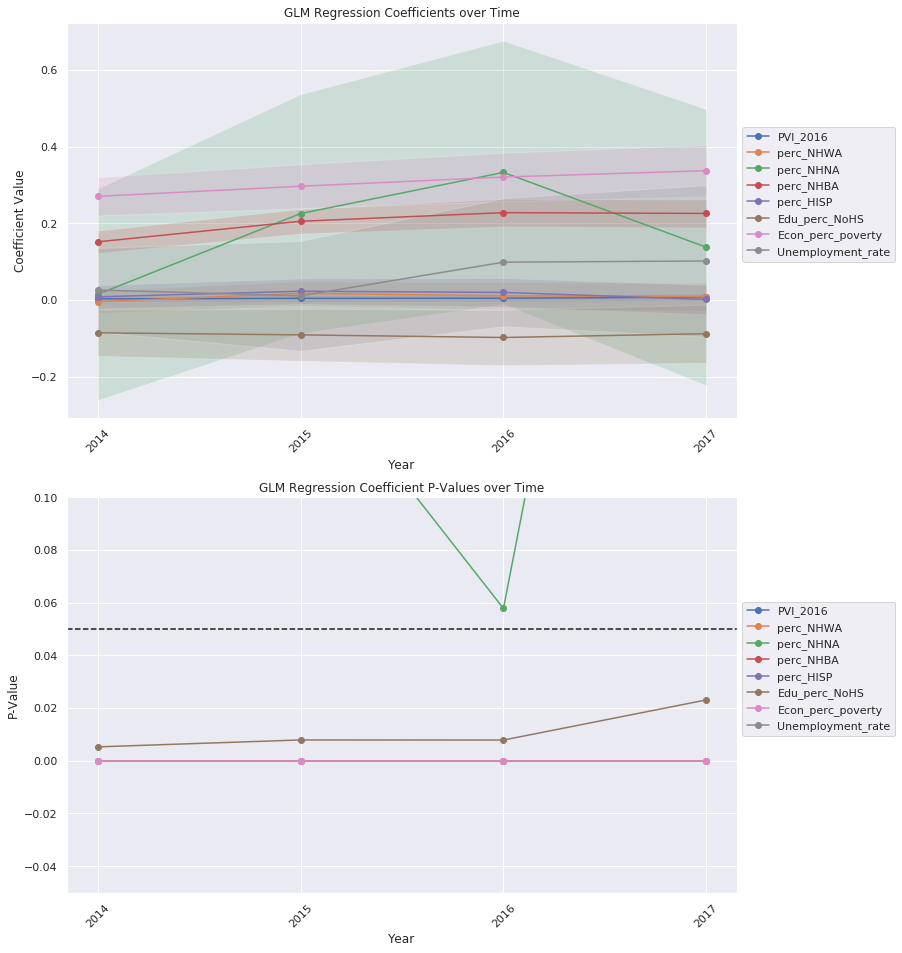

In [120]:
# plot formatting
linetype="-o" 
# plt.tight_layout()

# generate plots
plt.figure(1, figsize=(12, 16))
plt.subplot(211)
for feature in features:
    plt.plot(coeffs_full["year"], coeffs_full[feature], linetype)
    plt.fill_between(coeffs_full["year"], 
                     coeffs_full[f"{feature}_lower"].astype(float), 
                     coeffs_full[f"{feature}_upper"].astype(float), alpha=0.2)
plt.xticks(coeffs["year"], rotation=45)
plt.xlabel("Year")
plt.ylabel("Coefficient Value")
plt.title("GLM Regression Coefficients over Time")
plt.legend(bbox_to_anchor=(1, 0.75))

plt.subplot(212)
for feature in features:
    plt.plot(pvals["year"], pvals[feature], linetype)
plt.axhline(y=0.05, color='k', linestyle='--')
plt.ylim((-0.05, 0.1))
plt.xticks(coeffs["year"], rotation=45)
plt.xlabel("Year")
plt.ylabel("P-Value")
plt.title("GLM Regression Coefficient P-Values over Time")
plt.legend(bbox_to_anchor=(1, 0.75))
